In [11]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import cmocean as cm
from xgcm import Grid

In [34]:
def plot(ax,yy0,tt,i,variable,varname,vmin1,vmax1,cmap,ymax):
#    prog = open_files(label)
#    ocean_static = xr.open_dataset('ocean_geometry.nc')
    grid = Grid(prog,coords={"x":{"center":"xh","outer":"xq"},
                             "y":{"center":"yh","outer":"yq"},
                             "z":{"center":"zl","outer":"zi"}},periodic=False)
    file_name = label
#    IC = open_IC(label)
    depth = prog.e#,'x')
    lon = ocean_static.geolon
    dataplot = variable

    xx = lon
    if (varname == "uo") or (varname == "PFu"): dataplot = dataplot[:,:,:,:-1]
    levels = np.linspace(vmin1, vmax1, 51)
    yy = depth[:,:,yy0,:]
    z_levels = yy.shape[1]
    yi = np.linspace(0,5000,z_levels) 
    xi, yyi = np.meshgrid(xx[yy0,:], yi) 
    cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
    
    if varname =="uo":
        plt.colorbar(cax, ax = ax, label = 'u (m/s)')
    else:
        plt.colorbar(cax, ax = ax, label = varname)
    
    ## plot interface heights
    i_heights = prog.e # this is 'Interface Height Relative to Mean Sea Level'
    # do for one time
    i_heights = i_heights.isel(Time = tt)
    # take zonal mean
    i_heights = i_heights.isel(yh = yy0)#.mean('xh')

    # plot a line of layer depths, layer by layer
    nz = len(i_heights.zi)
    xh = prog.xh

    for i in range(nz):
        ax.plot(xh,i_heights[i], color = 'k', linewidth = 0.5)
    
    ax.set_ylim(ymin=-ymax,ymax=0)
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('x (km)')
    ax.set_title(varname+' , ' +label)
    


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/3041475198.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/3041475198.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/

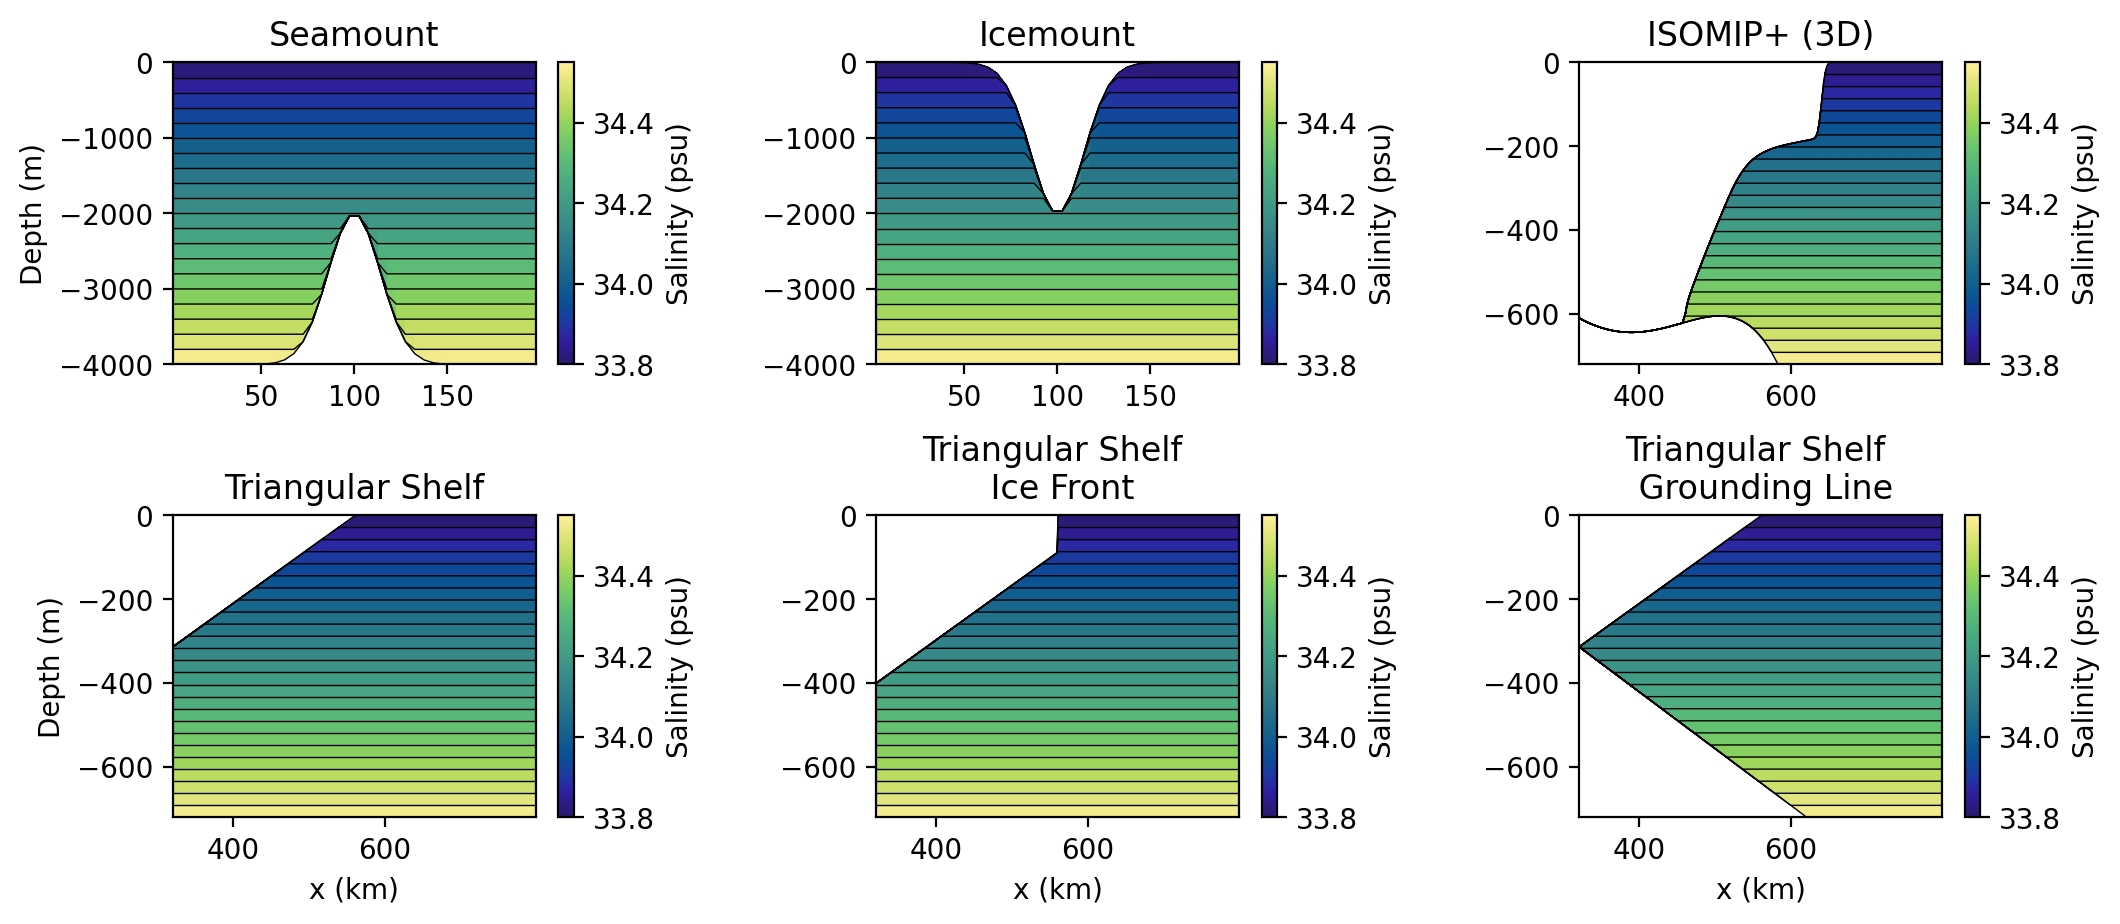

In [32]:

fig, axes = plt.subplots(ncols = 3,nrows = 2, figsize = (12,5),dpi = 200)

label = 'seamount'


prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-toposeamount-zstar-minthick1e-12-intxpa.nc')
ocean_static = xr.open_dataset('seamount-shelf/ocean_geometry.nc')
x = 0
time = 0
ymax = 4000
plot(axes[0,0],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,0].set_title('Seamount')

prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-zstar-minthick1e-12-intxpa.nc')
ocean_static = xr.open_dataset('seamount-shelf/ocean_geometry.nc')
x = 0
time = 0
ymax = 4000
plot(axes[0,1],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,1].set_title('Icemount')


prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,0],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,0].set_title('Triangular Shelf')

prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12-verticefront.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,1],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,1].set_title('Triangular Shelf \n Ice Front')

prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12-topo.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,2],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,2].set_title('Triangular Shelf \n Grounding Line')

prog = xr.open_dataset('layer-MOM6-examples/archive/prog-zstar.nc')
ocean_static = xr.open_dataset('layer-MOM6-examples/ocean_geometry.nc')
x = 20
time = 0
ymax = 720
plot(axes[0,2],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,2].set_title('ISOMIP+ (3D)')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')

axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,2].set_ylabel('')

fig.subplots_adjust(wspace = 0.55,hspace = 0.5)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/3041475198.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/3041475198.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/

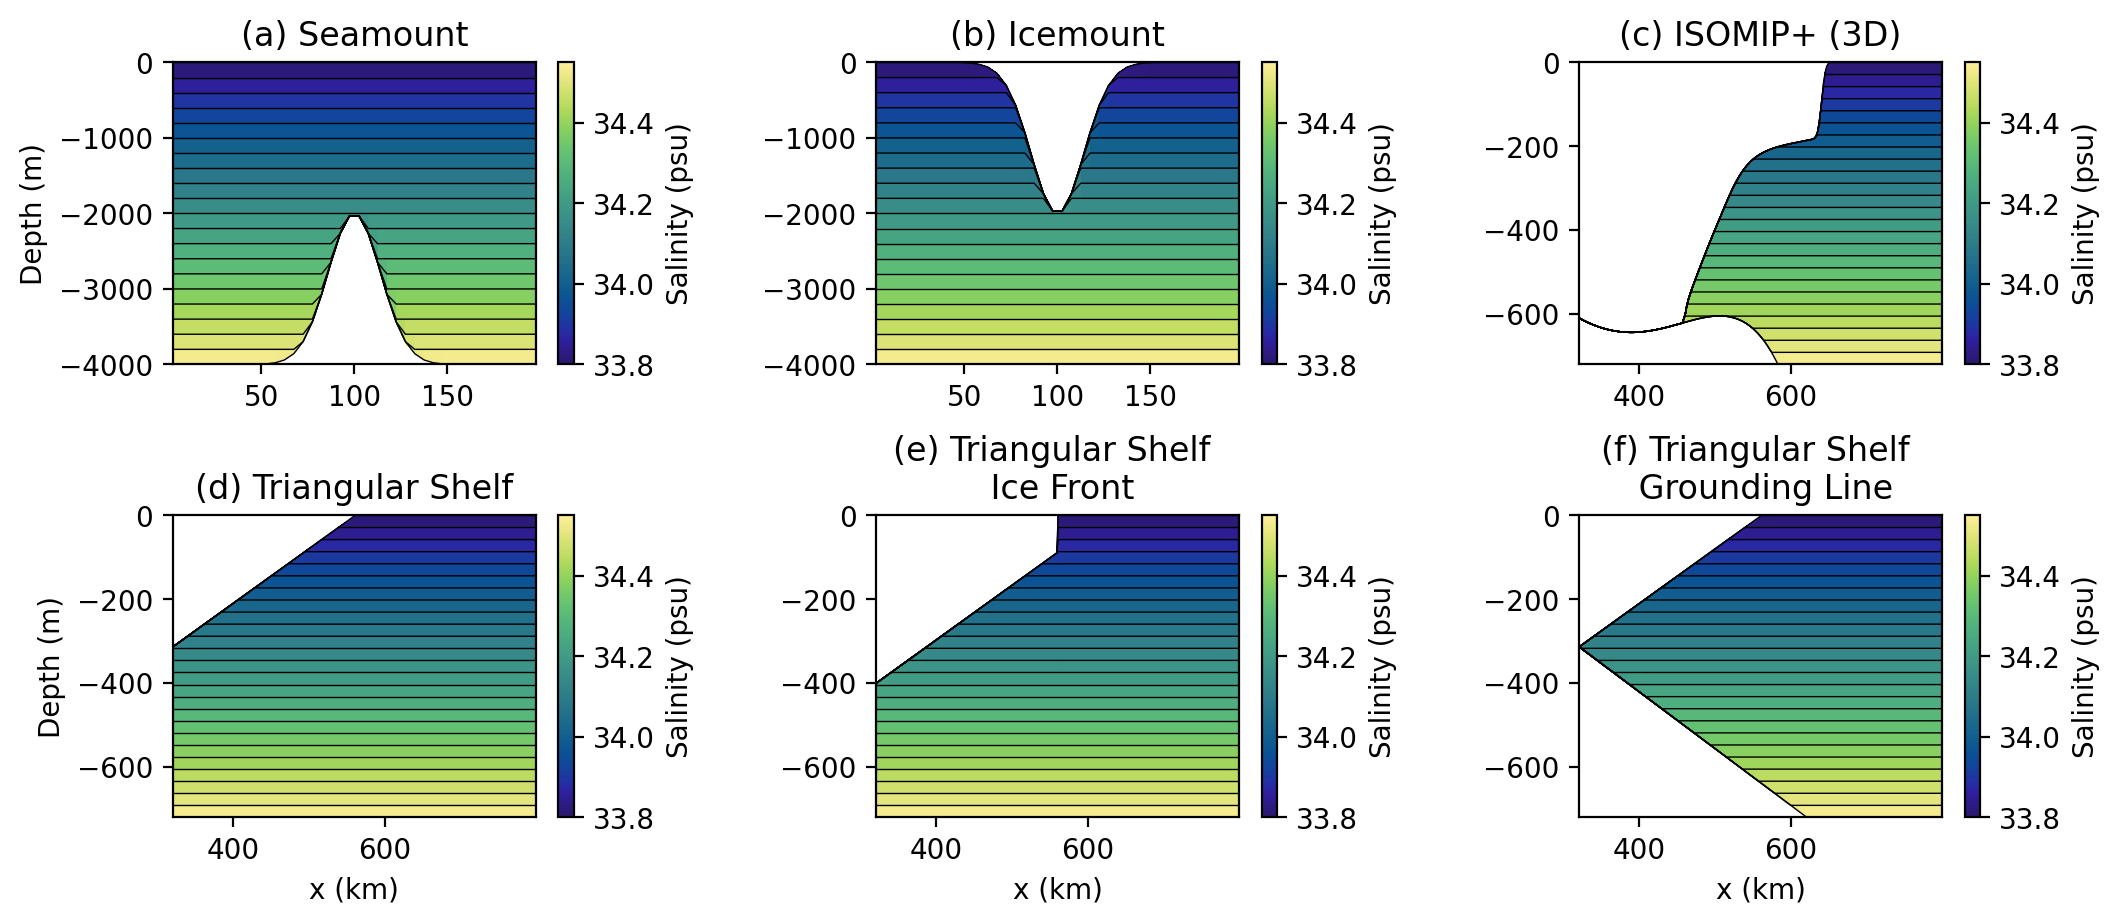

In [33]:

fig, axes = plt.subplots(ncols = 3,nrows = 2, figsize = (12,5),dpi = 200)

label = 'seamount'


prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-toposeamount-zstar-minthick1e-12-intxpa.nc')
ocean_static = xr.open_dataset('seamount-shelf/ocean_geometry.nc')
x = 0
time = 0
ymax = 4000
plot(axes[0,0],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,0].set_title('(a) Seamount')

prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-zstar-minthick1e-12-intxpa.nc')
ocean_static = xr.open_dataset('seamount-shelf/ocean_geometry.nc')
x = 0
time = 0
ymax = 4000
plot(axes[0,1],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,1].set_title('(b) Icemount')


prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,0],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,0].set_title('(d) Triangular Shelf')

prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12-verticefront.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,1],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,1].set_title('(e) Triangular Shelf \n Ice Front')

prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12-topo.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = 0
ymax = 720
plot(axes[1,2],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[1,2].set_title('(f) Triangular Shelf \n Grounding Line')

prog = xr.open_dataset('layer-MOM6-examples/archive/prog-zstar.nc')
ocean_static = xr.open_dataset('layer-MOM6-examples/ocean_geometry.nc')
x = 20
time = 0
ymax = 720
plot(axes[0,2],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
axes[0,2].set_title('(c) ISOMIP+ (3D)')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[0,2].set_xlabel('')

axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,2].set_ylabel('')

fig.subplots_adjust(wspace = 0.55,hspace = 0.5)


/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/1612887352.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/psqyj9ns2m9b5kxdvtqz90bm0000gp/T/ipykernel_987/1612887352.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax = ax.pcolormesh(xi,yy[tt,...],dataplot[tt,:,yy0,:],vmin = vmin1, vmax = vmax1, cmap = cmap)
/var/folders/dq/

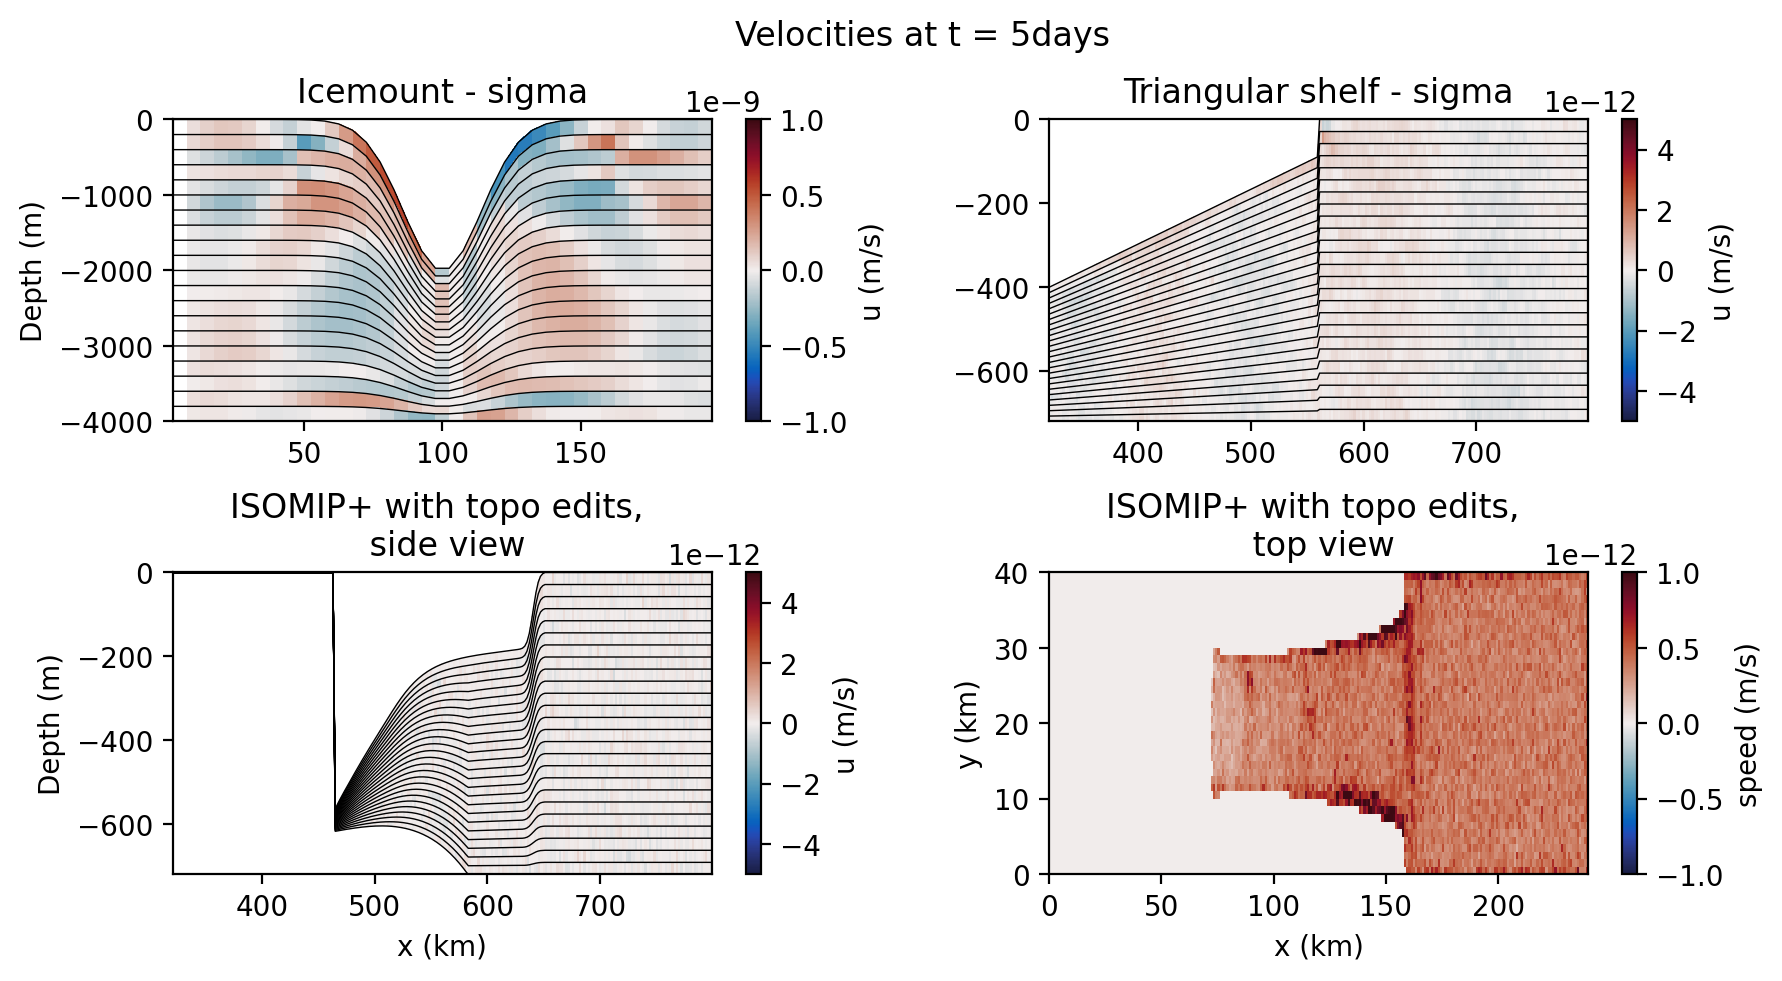

In [99]:
fig, axes = plt.subplots(ncols = 2,nrows = 2, figsize = (10,5),dpi = 200)

label = 'seamount'


prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-sigma-minthick1e-12-intxpa-hack.nc')
ocean_static = xr.open_dataset('seamount-shelf/ocean_geometry.nc')
x = 0
time = 24*5*4
ymax = 4000
plot(axes[0,0],x,time,0,prog.u,"uo",-1e-9,1e-9,cm.cm.balance,ymax)
axes[0,0].set_title('Icemount - sigma')

prog = xr.open_dataset('2D-triangle-quiet/intxpa-testing/prog-sigma-intxpa.nc')
ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
x = 0
time = -1
ymax = 720
plot(axes[0,1],x,time,0,prog.u,"uo",-5e-12,5e-12,cm.cm.balance,ymax)
axes[0,1].set_title('Triangular shelf - sigma')


prog = xr.open_dataset('layer-MOM6-examples/archive/prog-zstar-excavate.nc').fillna(0)
ocean_static = xr.open_dataset('layer-MOM6-examples/ocean_geometry.nc').fillna(0)
x = 20
time = -1
ymax = 720
plot(axes[1,0],x,time,0,prog.u.fillna(0),"uo",-5e-12,5e-12,cm.cm.balance,ymax)
axes[1,0].set_title('ISOMIP+ with topo edits, \n side view')

p1 = axes[1,1].pcolormesh(np.max((np.sqrt(prog.u.isel(Time = -1).values[:,:,:-1]**2+prog.v.isel(Time = -1).values[:,:-1,:]**2)),axis = 0),
                                                                                   vmin = -1e-12,vmax = 1e-12,
                                                                                   cmap = cm.cm.balance)#,
                                                                                  #cbar_kwargs = {'label':'u (m/s)'})
plt.colorbar(p1, label = 'speed (m/s)')

# prog.u.isel(Time = -1).mean('zl').where(prog.u.isel(Time = -1).mean('zl')!=0).plot(ax = axes[1,1],
#                                                                                    vmin = -1e-12,vmax = 1e-12,
#                                                                                    cmap = cm.cm.balance,
#                                                                                   cbar_kwargs = {'label':'u (m/s)'})
# prog = xr.open_dataset('2D-triangle-quiet/archive/prog-zstar-surfpressure-hack-minthick1e-12-verticefront.nc')
# ocean_static = xr.open_dataset('2D-triangle-quiet/ocean_geometry.nc')
# x = 0
# time = 0
# ymax = 720
# plot(axes[1,1],x,time,0,prog.salt,"Salinity (psu)",33.8,34.55,cm.cm.haline,ymax)
# axes[1,1].set_title('ISOMIP+')

axes[1,1].set_xlabel('x (km)')
axes[1,1].set_title('ISOMIP+ with topo edits, \n top view')

axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')

axes[0,1].set_ylabel('')
axes[1,1].set_ylabel('y (km)')

fig.suptitle('Velocities at t = 5days')
fig.subplots_adjust(wspace = 0.3,hspace = 0.5)


In [57]:
from matplotlib import pyplot as plt, animation
%matplotlib inline

# This is needed to display graphics calculated outside of jupyter notebook
from IPython.display import HTML, display
# this is to make sure there is no size limit
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128


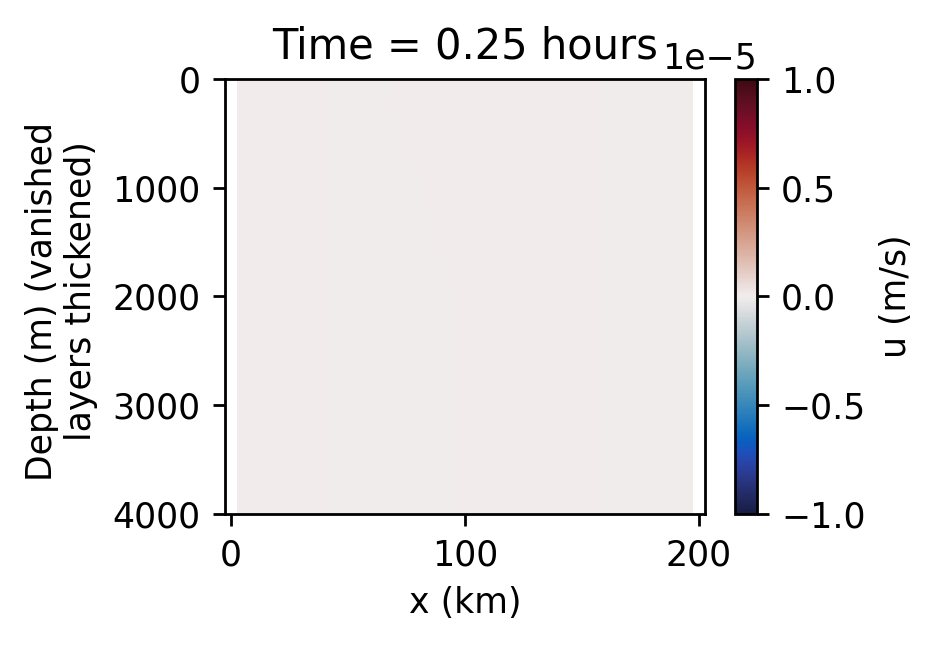

In [82]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-zstar-minthick1e-12-intxpa.nc')

fig, axes = plt.subplots(figsize = (4,3),dpi = 250)
time = 0
prog.u.isel(Time = 0, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-5, vmin = -1e-5, cmap = cm.cm.balance, 
                                  cbar_kwargs = {'label':'u (m/s)'})
axes.set_xlabel('x (km)')
axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

axes.set_title('Time = '+str((time+1)*0.25)+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    prog.u.isel(Time = frame, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-5, vmin = -1e-5, cmap = cm.cm.balance, add_colorbar = False)
    axes.set_xlabel('x (km)')
    axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

    axes.set_title('Time = '+str((frame+1)*0.25)+' hours')
fig.subplots_adjust(left = 0.3, bottom = 0.3)
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12*4,       # Could also be iterable or list
    interval=100     # ms between frames
)

In [83]:
#save!
writergif = animation.PillowWriter(fps=5) 

path = 'icemount-u.gif'
ani.save(path,writer=writergif, dpi = 300)

#display(HTML("<video controls><source src="+path+" type='video/mp4'></video>"))


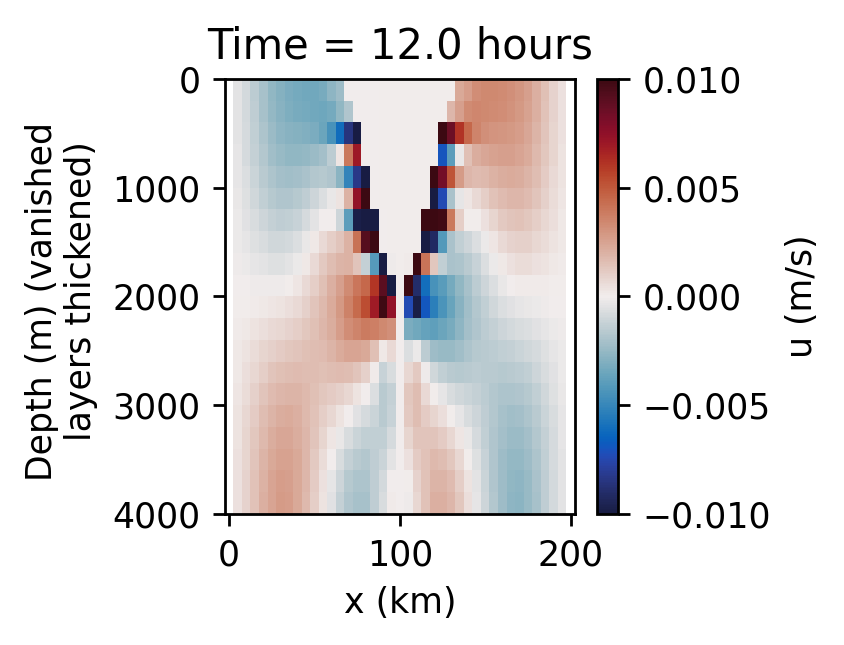

In [105]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
prog = xr.open_dataset('seamount-shelf/intxpa-testing/prog-zstar-minthick1e-12-oldintxpa.nc')

fig, axes = plt.subplots(figsize = (5,3),dpi = 250)
time = 0
prog.u.isel(Time = 0, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-2, vmin = -1e-2, cmap = cm.cm.balance, 
                                  cbar_kwargs = {'label':'u (m/s)'})
axes.set_xlabel('x (km)')
axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

axes.set_title('Time = '+str((time+1)*0.25)+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    prog.u.isel(Time = frame, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-2, vmin = -1e-2, cmap = cm.cm.balance, add_colorbar = False)
    axes.set_xlabel('x (km)')
    axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

    axes.set_title('Time = '+str((frame+1)*0.25)+' hours')
fig.subplots_adjust(left = 0.3, bottom = 0.3, right = 0.65)
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12*4,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=5) 

path = 'icemount-u.gif'
ani.save(path,writer=writergif, dpi = 300)

#display(HTML("<video controls><source src="+path+" type='video/mp4'></video>"))


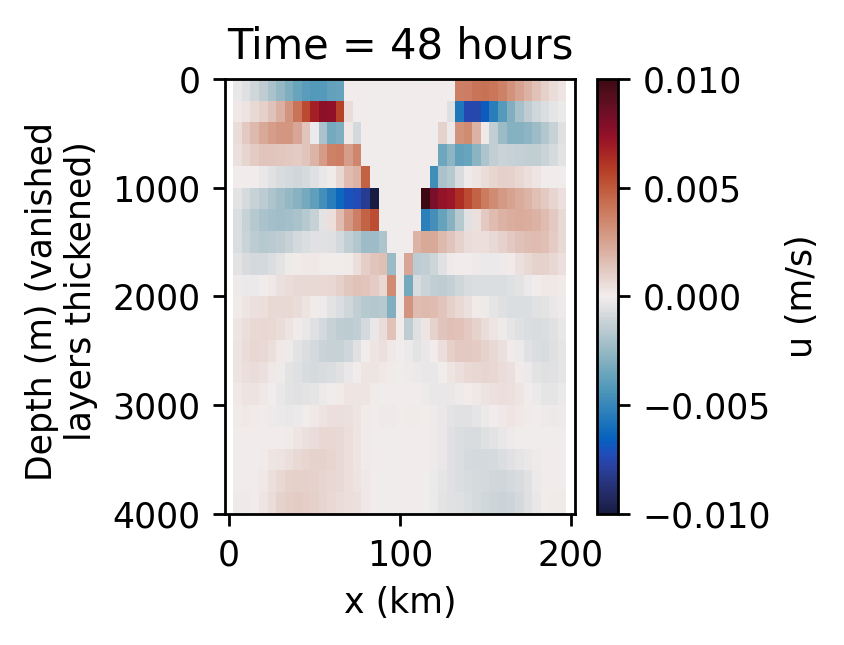

In [107]:
# Get a handle on the figure and the axes

# Plot the initial frame. 
prog = xr.open_dataset('seamount-shelf/archive/prog-zstar.nc')

fig, axes = plt.subplots(figsize = (5,3),dpi = 250)
time = 0
prog.u.isel(Time = 0, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-2, vmin = -1e-2, cmap = cm.cm.balance, 
                                  cbar_kwargs = {'label':'u (m/s)'})
axes.set_xlabel('x (km)')
axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

axes.set_title('Time = '+str((time+1))+' hours')

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    axes.clear()
    prog.u.isel(Time = frame, yh = 0).plot(ax = axes,yincrease = False, vmax = 1e-2, vmin = -1e-2, cmap = cm.cm.balance, add_colorbar = False)
    axes.set_xlabel('x (km)')
    axes.set_ylabel('Depth (m) (vanished \n layers thickened)')

    axes.set_title('Time = '+str((frame+1))+' hours')
fig.subplots_adjust(left = 0.3, bottom = 0.3, right = 0.65)
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12*4,       # Could also be iterable or list
    interval=100     # ms between frames
)
#save!
writergif = animation.PillowWriter(fps=5) 

path = 'icemount-u.gif'
ani.save(path,writer=writergif, dpi = 300)

#display(HTML("<video controls><source src="+path+" type='video/mp4'></video>"))
